In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import sys
sys.path.append("./build-clang-5.0-dbg/language_bindings/python/")

from numpy.linalg import norm
import muSpectre as µ

In [ ]:
def curve(delta_t, tau_y0 = 200e6,     m_par = .02, gamma_dot0=.1,     h0 = 0e9 ,   a_par = 0,         max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    crystal = True
    if crystal:
        mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
            cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)
    else:
        mat = µ.material.MaterialHyperElastoPlastic1_2d.make(
            cell, "hyper-elasto-plastic", 210e9, .3, tau_y0, h0)

    for pixel in cell:
        if crystal:
            mat.add_pixel(pixel, np.array([[0.]]))
        else:
            mat.add_pixel(pixel)

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        for step in range(np_load):
            F[0,1] += shear_incr
            gammas.append(F[0,1])

            stress = cell.evaluate_stress(F.T.reshape(-1))
            mat.save_history_variables()
            tau.append(stress[2])
            sigma_xx.append(stress[0])
            tau_inc.append(mat.get_real_field("dummy τ_inc"))
            gamma_dot.append(mat.get_real_field("dummy γ_dot"))
            #print("gamma = np.array([{}])".format(", ".join(
                #    ("{}".format(g) for g in gammas))))
            #print("tau = np.array([{}])".format(", ".join(
                #    ("{}".format(t) for t in tau))))

    tau_inc = np.array(tau_inc).reshape(-1)
    gamma_dot = np.array(gamma_dot).reshape(-1)
    gammas = np.array(gammas).reshape(-1)
    tau = np.array(tau)

    return gammas, tau, gamma_dot, tau_inc
tau_y0 = 200e6;
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .03)
    tg_bar = (tau_inc/gamma_dot).mean()
    tg_std = (tau_inc/gamma_dot).std()

    plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.ylabel('γ₁₂');




In [ ]:
tau_y0 = 200e6;
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .1, gamma_dot0 =1e-4/dt, h0=1000e9, a_par = 1.5, max_shear=10e-2)
    tg_bar = (tau_inc/gamma_dot).mean()
    tg_std = (tau_inc/gamma_dot).std()

    plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
    print(tau.max())
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.grid(True)
plt.ylabel('γ₁₂');


In [ ]:
tau_y0 = 200e6;
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .03)
    tg_bar = (gamma_dot/.1).mean()
    tg_std = (gamma_dot/.1).std()

    ##plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    plt.plot(gammas, gamma_dot/.1, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.ylabel('γ_dot');
plt.figure()
plt.plot(tau_inc/gamma_dot)

In [ ]:
tau_y0 = 200e6;
gamma_dot_default=.1
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .5 , gamma_dot0=1e-2)
    tg_bar = (gamma_dot/.1).mean()
    tg_std = (gamma_dot/.1).std()

    ##plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    plt.plot(gammas, gamma_dot/.1, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.ylabel('γ_dot');


In [ ]:
tau = np.array((.99681e+08,
    3.06304e+08,
    3.13596e+08,
    3.1911e+08 ,
    3.25063e+08,
    3.29757e+08,
    3.34694e+08,
    3.38743e+08,
    3.42899e+08,
    3.46425e+08))
tau = np.array([2.22542e+08, 2.78801e+08, 2.62275e+08, 2.73714e+08, 2.67101e+08, 2.7146e+08, 2.68786e+08, 2.70508e+08, 2.69431e+08, 2.70117e+08, 2.69684e+08, 2.69958e+08, 2.69784e+08, 2.69894e+08, 2.69824e+08, 2.69868e+08, 2.69839e+08, 2.69857e+08, 2.69845e+08, 2.69852e+08, 2.69847e+08, 2.6985e+08, 2.69847e+08, 2.69848e+08, 2.69847e+08])



plt.plot(tau)


In [ ]:
gamma = np.array([0.005, 0.010000000000000002, 0.015000000000000003, 0.020000000000000004, 0.025000000000000005, 0.030000000000000006, 0.035, 0.04, 0.045000000000000005, 0.05])
tau = np.array([296130891.4393467, 295450799.7219975, 296024844.9454069, 295554586.12864435, 295940972.1918171, 295624237.6484094, 295884371.1672535, 295671061.16190904, 295846202.27996933, 295702553.6179742])
plt.plot(gamma, tau)

In [ ]:
def fun18(t, m=.1, s=1., gamma_dot0=.1):
    return gamma_dot0 * (abs(t)/s)**(1/m)*np.sign(t)

tau = np.linspace(-2, 2)
plt.plot(tau, fun18(tau))

In [ ]:
def fun19(gamma_dot, tau_star=2, delta_t = .1, young_schmid = 2):
    return tau_star - delta_t*gamma_dot*young_schmid
gamma_dot = np.linspace(-100, 100)
plt.plot(gamma_dot, fun19(gamma_dot))

In [ ]:
def residual(gamma_dot, gamma_dot0=.1, tau_star=2, delta_t=.1, young_schmid=2, s=1, m=.1):
    tau = fun19(gamma_dot, tau_star, delta_t, young_schmid)
    return gamma_dot - fun18(tau, m, s, gamma_dot0)

def residual_jac(gamma_dot, gamma_dot0=.1, tau_star=2, delta_t=.1, young_schmid=2, s=1, m=.1):
    tau = fun19(gamma_dot, tau_star, delta_t, young_schmid)
    return 1.-.5*delta_t*gamma_dot0/m*abs(tau)**((1-m)/m)*s**(-1/m)*young_schmid*np.sign(tau)
gamma_dot = np.linspace(-2, 23)
plt.plot(gamma_dot, residual(gamma_dot), label="γ_dot = .1")
plt.plot(gamma_dot, residual(gamma_dot, gamma_dot0=.01), label="γ_dot = .01")
plt.legend()

In [ ]:
def load_to_a_point(delta_t=1e-3,
                    tau_y0 = 200e6,
                    m_par = .1,
                    gamma_dot0=.1,
                    h0 = 0e9 ,
                    a_par = 0,
                    max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        for step in range(np_load):
            F[0,1] += shear_incr
            gammas.append(F[0,1])

            stress = cell.evaluate_stress(F.T.reshape(-1))
            print(stress)
            mat.save_history_variables()
            tau.append(stress[2])
            sigma_xx.append(stress[0])
            tau_inc.append(mat.get_real_field("dummy τ_inc"))
            gamma_dot.append(mat.get_real_field("dummy γ_dot"))
            #print("gamma = np.array([{}])".format(", ".join(
                #    ("{}".format(g) for g in gammas))))
            #print("tau = np.array([{}])".format(", ".join(
                #    ("{}".format(t) for t in tau))))

    tau_inc = np.array(tau_inc).reshape(-1)
    gamma_dot = np.array(gamma_dot).reshape(-1)
    gammas = np.array(gammas).reshape(-1)
    tau = np.array(tau)
    print(stress)

    def fun(F_vec):
        stress = cell.evaluate_stress(F_vec)
        return stress

    return fun, F.T.reshape(-1)


In [ ]:
def elastic_load_to_a_point(delta_t=1e-3,
                            m_par = .1,
                            gamma_dot0=.1,
                            h0 = 0e9 ,
                            a_par = 0,
                            max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;
    tau_y0 = 1e200

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        F[0,1] += max_shear
        gammas.append(F[0,1])

        stress = cell.evaluate_stress(F.T.reshape(-1))

    def fun(F_vec):
        stress = cell.evaluate_stress(F_vec)
        return stress

    return fun, F.T.reshape(-1)


In [ ]:
fun, F = elastic_load_to_a_point(max_shear=1e-2)

In [ ]:
def numerical_gradient(fun, x, delta):
    dim = len(x)
    grad = np.zeros([dim, dim])
    for i in range(dim):
        del_x = np.zeros_like(x)
        del_x[i] += delta
        del_f = fun(x + del_x).copy()
        del_f -= fun(x)
        del_f /= delta
        #print("{}:\ndel_x: {}\ndelf: {}\nf+: {}\nf-: {}".format(i, del_x, del_f, fun(x + del_x), fun(x)))
        grad[:,i] = del_f
        pass
    return grad

In [ ]:
#%%debug
ref = np.array([[3.35e+11,        0,  9.5e+08,  9.5e+10],
                [ 1.2e+09,  1.2e+11,  1.2e+11,        0],
                [ 1.2e+09,  1.2e+11,  1.2e+11,        0],
                [ 9.5e+10,        0, 3.35e+09, 3.35e+11]])
num_grad = numerical_gradient(fun, F, delta=1e-6)
print(num_grad)
print(norm(num_grad-ref)/norm(ref))
print(num_grad - ref)

In [ ]:
errors = np.zeros(200)
deltas = np.logspace(-1, -20, len(errors))
for i, delta in enumerate(deltas):
    num_grad = numerical_gradient(fun, F, delta)
    errors[i] = norm(num_grad-ref)/norm(ref)
plt.loglog(deltas, errors)

In [ ]:
def elastic_law(delta_t=1e-3,
                m_par = .1,
                gamma_dot0=.1,
                h0 = 0e9 ,
                a_par = 0,
                max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;
    tau_y0 = 1e200

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        F[0,1] += max_shear
        gammas.append(F[0,1])

        stress = cell.evaluate_stress(F.T.reshape(-1))

    def fun(F_vec):
        stress = cell.evaluate_stress(F_vec)
        return stress

    return fun, F.T.reshape(-1)


E = 1.0030648180242636, ν = 0.299306759098787
nb load steps = 10
K_input = 0.833000000000001, mu_input = 0.386


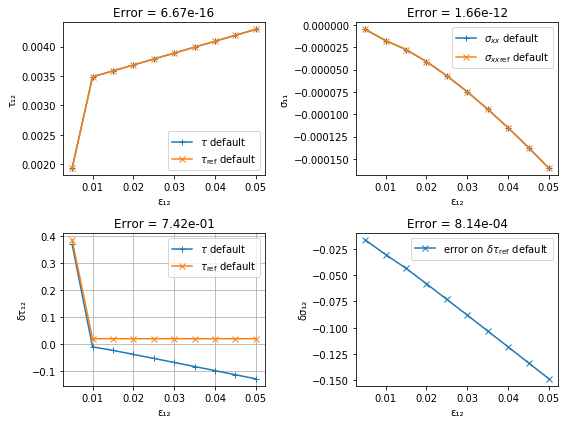

In [2]:
def hyper_curve(Young, Poisson, tau_y0 = 200e6, h0 = 10e9, max_shear = 10e-2,
                shear_incr = 1e-4):
    print("E = {}, ν = {}".format(Young, Poisson))

    tolerance=1e-12
    dim = 3
    resolution = [1, 1] if dim == 2 else [1, 1, 1]
    lengths = resolution.copy()
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat_type = µ.material.MaterialHyperElastoPlastic1_3d if dim == 3 else µ.material.MaterialHyperElastoPlastic1_2d
    mat = mat_type.make(
        cell, "hyper-elasto-plastic", Young, Poisson, tau_y0, h0)

    for pixel in cell:
        mat.add_pixel(pixel)

        cell.initialise()

        tau = list()
        sigma_xx=list()
        dtau = list()
        dsigma_xx=list()
        gammas=list()
        #tau_inc = list()
        #gamma_dot = list()
        nb_load = int(max_shear/shear_incr)
        print("nb load steps = {}".format(nb_load))
        F = np.eye(dim)

        for step in range(nb_load):
            F[0,1] += shear_incr
            gammas.append(F[0,1])

            stress, tangent = cell.evaluate_stress_tangent(F.T.reshape(-1))
            mat.save_history_variables()

            tangent_mat = tangent.reshape([dim**2, dim**2])
            dtau.append(tangent_mat[dim, dim])
            dsigma_xx.append(tangent_mat[0,0])
            tau.append(stress[dim])
            sigma_xx.append(stress[0])
    gammas = np.array(gammas).reshape(-1)
    tau = np.array(tau).reshape(-1)
    dtau = np.array(dtau).reshape(-1)
    sigma_xx = np.array(sigma_xx).reshape(-1)
    dsigma_xx = np.array(dsigma_xx).reshape(-1)

    #print("K:\n{}".format(tangent_mat))
    return gammas, tau, sigma_xx, dtau, dsigma_xx

bulk_m = .833
shear_m = .386
Young = 9*bulk_m*shear_m/(3*bulk_m + shear_m)
Poisson = Young/(2*shear_m) - 1
h = .008*8
tau_y0 = .006

shear_incr = 5e-3
max_shear = 5e-2

gammas, tau, sigma_xx, dtau, dsigma_xx = hyper_curve(Young, Poisson,
                                    tau_y0 = tau_y0, h0 = h, max_shear = max_shear,
                                    shear_incr = shear_incr)
from dummy import reference_curve
gamma_ref, tau_ref, sigma_xx_ref, dtau_ref, dsigma_xx_ref = (
    reference_curve(tauy0_input=tau_y0,
                    h_input = h,
                    max_shear = max_shear,
                    E = Young,
                    nu= Poisson,
                    shear_incr = shear_incr))

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)

ax1.plot(gammas, tau, "+-", label=r"$\tau$ default")
ax1.plot(gamma_ref, tau_ref, "x-", label=r"$\tau_{\mathrm{ref}}$ default")

ax1.legend(loc='best')
ax1.set_title("Error = {:.2e}".format(np.linalg.norm(tau-tau_ref)/
                                      np.linalg.norm(tau_ref)))
ax1.set_xlabel('ε₁₂')
ax1.set_ylabel('τ₁₂');

ax2 = fig.add_subplot(222)
ax2.plot(gammas, sigma_xx, "+-", label=r"$\sigma_{xx}$ default")
ax2.plot(gamma_ref, sigma_xx_ref, "x-", label=r"${\sigma_{xx}}_{\mathrm{ref}}$ default")
ax2.legend(loc='best')
ax2.set_title("Error = {:.2e}".format(np.linalg.norm(sigma_xx-sigma_xx_ref)/
                                      np.linalg.norm(sigma_xx_ref)))
ax2.set_xlabel('ε₁₂')
ax2.set_ylabel('σ₁₁');

ax3 = fig.add_subplot(223)

ax3.plot(gammas, dtau, "+-", label=r"$\tau$ default")
ax3.plot(gamma_ref, dtau_ref, "x-", label=r"$\tau_{\mathrm{ref}}$ default")

ax3.legend(loc='best')
ax3.set_title("Error = {:.2e}".format(np.linalg.norm(dtau-dtau_ref)/
                                      np.linalg.norm(dtau_ref)))
ax3.set_xlabel('ε₁₂')
ax3.set_ylabel('δτ₁₂');
ax3.grid(True)

ax4 = fig.add_subplot(224)

#ax4.plot(gammas, dsigma_xx, "+-", label=r"$\sigma_{xx}$ default")
#ax4.plot(gamma_ref, dsigma_xx_ref, "x-", label=r"${\sigma_{xx}}_{\mathrm{ref}}$ default")
ax4.plot(gamma_ref, dtau-dtau_ref, "x-", label=r"error on $\delta\tau_{\mathrm{ref}}$ default")

ax4.legend(loc='best')
ax4.set_title("Error = {:.2e}".format(np.linalg.norm(dsigma_xx-dsigma_xx_ref)/
                                      np.linalg.norm(dsigma_xx_ref)))
ax4.set_xlabel('ε₁₂')
ax4.set_ylabel('δσ₁₂');
fig.tight_layout()
